# Extract ELA, beta, CMB from Thomas Schuler files

The data are based on this paper: https://tc.copernicus.org/articles/13/2259/2019/#section6

The digital elevation model can be accessed at https://doi.org/10.21334/npolar.2014.dce53a47 (Norwegian Polar Institute, 2014). The glacier and land masks were constructed from glacier outlines, which are available at https://doi.org/10.21334/npolar.2013.89f430f8 (König et al., 2013). The model outputs behind the presented figures of air temperature, precipitation, CMB, ELA, runoff, refreezing, T14, P14, snow onset, and disappearance dates are available in the following repository: https://doi.org/10.6084/m9.figshare.7836530.v1 (van Pelt et al., 2019). The full model dataset, of which only a selection is presented here, contains data with a 3-hourly temporal resolution and for an extended set of variables; a description of readily available data is accessible online (model output, http://www.wardvanpelt.com/model_output.txt, last access: 13 March 2019). Glacier-wide mass balances for KNG, HBR, HDF, MLB, and ABB are available in the database of the World Glacier Monitoring Service (WGMS; https://wgms.ch/, last access: 6 November 2018). Meteorological time series for Ny-Ålesund and Longyearbyen are accessible through the eKlima portal (Norwegian Meteorological Institute; http://eklima.met.no/, last access: 13 March 2019). The Kongsvegen AWS time series are also accessible at https://doi.org/10.21334/npolar.2017.5dc31930 (Kohler et al., 2017). Unrestricted access to the HIRLAM regional climate model data, point stake mass balance data, and the remaining AWS time series is provided upon request by contacting the institutes that collected/generated the data (see Sect. 2).


Runoff data availability: van Pelt, W. J. J., Pohjola, V. A., Pettersson, R., Marchenko, S., Kohler, J., Luks, B., Hagen, J. O., Schuler, T. V., Dunse, T., Noël, B., and Reijmer, C. H.: A long-term dataset of climatic mass balance, snow conditions and runoff in Svalbard (1957–2018), https://doi.org/10.6084/m9.figshare.7836530.v1, 2019. a (Raw data: https://figshare.com/articles/dataset/A_long-term_dataset_of_climatic_mass_balance_snow_conditions_and_runoff_in_Svalbard_1957-2018_/7836530/1)

# Convert .mat files into pd Dataframe

In [3]:
import numpy as np
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import pandas as pd

# Import data

In [4]:
mat_runoff = loadmat('data_set/data_thomas_ELA_beta/WVP_CMB_ELA_beta.mat')

ELA = mat_runoff['ELA']
beta = mat_runoff['beta']
cmb = mat_runoff['cmb']
X = mat_runoff['X']
Y = mat_runoff['Y']
Z = mat_runoff['Z']
year = mat_runoff['year']

In [5]:
df_ELA = pd.DataFrame(ELA[:, :, -1], index=Y[:, 0], columns=X[0]).unstack().reset_index()

df_ELA.columns = ['X' , 'Y', 'ELA']
df_ELA

,X,Y,ELA
0,382490,8450290,NaN
1,382490,8451290,NaN
2,382490,8452290,NaN
3,382490,8453290,NaN
4,382490,8454290,NaN
...,...,...,...
257395,849490,8995290,NaN
257396,849490,8996290,NaN
257397,849490,8997290,NaN
257398,849490,8998290,NaN


In [6]:
df_beta = pd.DataFrame(beta[:, :, -1], index=Y[:, 0], columns=X[0]).unstack().reset_index()

df_beta.columns = ['X' , 'Y', 'beta']
df_beta

,X,Y,beta
0,382490,8450290,NaN
1,382490,8451290,NaN
2,382490,8452290,NaN
3,382490,8453290,NaN
4,382490,8454290,NaN
...,...,...,...
257395,849490,8995290,NaN
257396,849490,8996290,NaN
257397,849490,8997290,NaN
257398,849490,8998290,NaN


In [7]:
df_cmb = pd.DataFrame(cmb[:, :, -1], index=Y[:, 0], columns=X[0]).unstack().reset_index()

df_cmb.columns = ['X' , 'Y', 'cmb']
df_cmb

,X,Y,cmb
0,382490,8450290,NaN
1,382490,8451290,NaN
2,382490,8452290,NaN
3,382490,8453290,NaN
4,382490,8454290,NaN
...,...,...,...
257395,849490,8995290,NaN
257396,849490,8996290,NaN
257397,849490,8997290,NaN
257398,849490,8998290,NaN


In [8]:
df_runoff = pd.merge(df_ELA, df_beta, on=['X', 'Y'])
df_runoff = pd.merge(df_runoff, df_cmb, on=['X', 'Y'])
df_runoff = df_runoff.dropna()
df_runoff

,X,Y,ELA,beta,cmb
14591,408490,8741290,603.058167,0.004152,-2.806572
15138,409490,8738290,603.058167,0.004403,-1.247225
15139,409490,8739290,603.058167,0.004388,-1.497246
15140,409490,8740290,603.058167,0.004498,-2.044743
15142,409490,8742290,603.058167,0.004488,-1.263965
...,...,...,...,...,...
254608,844490,8958290,6.401600,0.002050,0.255464
254609,844490,8959290,6.401600,0.002107,0.177512
254610,844490,8960290,6.401600,0.002150,0.076213
254611,844490,8961290,6.401600,0.002163,0.014600


In [94]:
df_runoff.ELA.max()

849.5266723632812

In [87]:
df_runoff.X

14591     408490
15138     409490
15139     409490
15140     409490
15142     409490
           ...  
254608    844490
254609    844490
254610    844490
254611    844490
254612    844490
Name: X, Length: 37987, dtype: int64

In [9]:
df_runoff.to_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced/df_ELA_beta_cmb.csv')

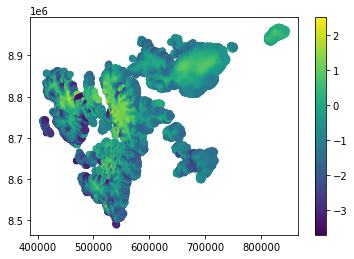

In [12]:
map_cmb = plt.scatter(df_runoff.X, df_runoff.Y, c=df_runoff.cmb)
plt.colorbar(map_cmb)

# Interpolate the data that it fits to the centerline coordinates

In [10]:
df_runoff

,X,Y,ELA,beta,cmb
14591,408490,8741290,603.058167,0.004152,-2.806572
15138,409490,8738290,603.058167,0.004403,-1.247225
15139,409490,8739290,603.058167,0.004388,-1.497246
15140,409490,8740290,603.058167,0.004498,-2.044743
15142,409490,8742290,603.058167,0.004488,-1.263965
...,...,...,...,...,...
254608,844490,8958290,6.401600,0.002050,0.255464
254609,844490,8959290,6.401600,0.002107,0.177512
254610,844490,8960290,6.401600,0.002150,0.076213
254611,844490,8961290,6.401600,0.002163,0.014600


In [2]:
import pandas as pd
df_runoff = pd.read_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced/df_ELA_beta_cmb.csv')
df_runoff.head()


,Unnamed: 0,X,Y,ELA,beta,cmb
0,14591,408490,8741290,603.058167,0.004152,-2.806572
1,15138,409490,8738290,603.058167,0.004403,-1.247225
2,15139,409490,8739290,603.058167,0.004388,-1.497246
3,15140,409490,8740290,603.058167,0.004498,-2.044743
4,15142,409490,8742290,603.058167,0.004488,-1.263965


In [3]:
df_bed_surf_thick_slope = pd.read_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced/df_bed_surf_elev.csv')
df_bed_surf_thick_slope.head()

/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,rgiid,x,y,Surge,BgnDate,EndDate,CenLon,CenLat,Area,...,Connect,Form,TermType,Linkages,Name,check_geom,geometry,bed,thickness,surface_elevation
0,0,RGI60-07.00001,552858.197838,8.514877e+06,0,20080901,-9999999,17.0347,76.7052,0.597,...,0,0,0,9,NaN,NaN,NaN,401.83295,4.16705,406.0
1,1,RGI60-07.00001,552837.209663,8.514876e+06,0,20080901,-9999999,17.0347,76.7052,0.597,...,0,0,0,9,NaN,NaN,NaN,401.83295,4.16705,406.0
2,2,RGI60-07.00001,552816.221488,8.514875e+06,0,20080901,-9999999,17.0347,76.7052,0.597,...,0,0,0,9,NaN,NaN,NaN,401.83295,4.16705,406.0
3,3,RGI60-07.00001,552795.233313,8.514875e+06,0,20080901,-9999999,17.0347,76.7052,0.597,...,0,0,0,9,NaN,NaN,NaN,401.83295,4.16705,406.0
4,4,RGI60-07.00001,552774.245139,8.514874e+06,0,20080901,-9999999,17.0347,76.7052,0.597,...,0,0,0,9,NaN,NaN,NaN,401.83295,4.16705,406.0


# Interpolate 2d data

In [22]:
import pandas as pd
from scipy.spatial.distance import cdist

def closest_point(point, points):
    """ Find closest point from a list of points. """
    return points[cdist([point], points).argmin()]

def match_value(df, col1, x, col2):
    """ Match value x from col1 row to value in col2. """
    return df[df[col1] == x][col2].values[0]

df_centerline_test = df_bed_surf_thick_slope
df_cmb_test = df_runoff

df_centerline_test['points'] = [(x, y) for x,y in zip(df_centerline_test['x'], df_centerline_test['y'])]
df_cmb_test['points'] = [(x, y) for x,y in zip(df_cmb_test['X'], df_cmb_test['Y'])]

## Really long to run.. approx 1hour locally

In [23]:
df_centerline_test['closest'] = [closest_point(x, list(df_cmb_test['points'])) for x in df_centerline_test['points']]
df_centerline_test['CMB'] = [match_value(df_cmb_test, 'points', x, 'cmb') for x in df_centerline_test['closest']]

In [36]:
df_centerline_test.head()

,Unnamed: 0,rgiid,x,y,Surge,BgnDate,EndDate,CenLon,CenLat,Area,...,Linkages,Name,check_geom,geometry,bed,thickness,surface_elevation,points,closest,CMB
0,0,RGI60-07.00001,552858.197838,8.514877e+06,0,20080901,-9999999,17.0347,76.7052,0.597,...,9,NaN,NaN,NaN,401.83295,4.16705,406.0,"(552858.1978384765, 8514876.79335722)","(552490, 8515290)",-0.83576
1,1,RGI60-07.00001,552837.209663,8.514876e+06,0,20080901,-9999999,17.0347,76.7052,0.597,...,9,NaN,NaN,NaN,401.83295,4.16705,406.0,"(552837.2096627597, 8514876.067688115)","(552490, 8515290)",-0.83576
2,2,RGI60-07.00001,552816.221488,8.514875e+06,0,20080901,-9999999,17.0347,76.7052,0.597,...,9,NaN,NaN,NaN,401.83295,4.16705,406.0,"(552816.2214876048, 8514875.342019048)","(552490, 8515290)",-0.83576
3,3,RGI60-07.00001,552795.233313,8.514875e+06,0,20080901,-9999999,17.0347,76.7052,0.597,...,9,NaN,NaN,NaN,401.83295,4.16705,406.0,"(552795.2333130117, 8514874.616350023)","(552490, 8515290)",-0.83576
4,4,RGI60-07.00001,552774.245139,8.514874e+06,0,20080901,-9999999,17.0347,76.7052,0.597,...,9,NaN,NaN,NaN,401.83295,4.16705,406.0,"(552774.2451389803, 8514873.890681034)","(552490, 8515290)",-0.83576


In [35]:
df_centerline_test.to_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced/df_SMB.csv')